### Dataset 02: Mental Health Monitor Using Wearable IoT Sensors

#### Data on Cognitive and Emotional States, EEG, GSR, and Student Demographics

- Dataset 02: [mental_health_wearable_data.csv](https://www.kaggle.com/datasets/ziya07/mental-health-monitor-using-wearable-iot-sensors)

## 📘 About the Dataset:
This dataset supports the analysis and detection of mental health states (stress, anxiety, cognitive overload) using wearable IoT sensors. It includes readings from EEG and GSR sensors worn by students in different session contexts. The dataset enables modeling of mental health conditions in real time by linking sensor data with emotional and cognitive states.



## 🗃️ File Information:

- **File Name:** mental_health_wearable_data.csv  
- **File Format:** CSV  
- **Total Records:** 500 rows  
- **File Size:** ~108 KB  
- **Sensors Used:** EEG (electroencephalogram), GSR (galvanic skin response)



## 🔑 Feature Descriptions:

### 🧬 Sensor Data
- `delta`, `theta`, `alpha`, `beta`: EEG frequency band values representing different brain activity states
- `GSR`: Galvanic skin response indicating emotional arousal or stress

### 🧠 Mental State Labels
- `Cognitive State`: Categorical (Focused, Distracted, Cognitive Overload)
- `Emotional State`: Categorical (Calm, Anxious, Stressed)

### 👤 Student Demographics
- `ID`: Unique identifier
- `Age`: Age of the student
- `Gender`: Gender of the student

### 🕒 Session Context
- `Session Type`: e.g., Study, Test, Relaxation
- `Session Duration`: In minutes
- `Environment`: e.g., Quiet Room, Library, Home

### ⚙️ Preprocessed Features
- `ICA Components`, `Mean GSR`: Features derived from signal preprocessing

### 🎯 Target Variable
- `Stress Label`: Binary target (1 = High Stress, 0 = Low Stress)

---


# Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from scipy import stats


# Dataset Analysis

DATASET OVERVIEW
Shape: (500, 15)
Columns: ['GSR_Values', 'Cognitive_State', 'Emotional_State', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)', 'Environmental_Context', 'Target', 'EEG_Band_1', 'EEG_Band_2', 'EEG_Band_3', 'EEG_Band_4', 'Feature_1', 'Feature_2']

Sample:
   GSR_Values     Cognitive_State Emotional_State  Age  Gender Session_Type  \
0    1.376494          Distracted         Anxious   19  Female        Study   
1    0.084319             Focused        Stressed   20    Male         Test   
2    0.895629  Cognitive Overload         Anxious   24    Male         Test   
3    0.386398             Focused         Anxious   22    Male   Relaxation   
4    1.186898             Focused         Anxious   22  Female   Relaxation   

   Duration (minutes) Environmental_Context  Target  EEG_Band_1  EEG_Band_2  \
0                  43               Library       0    7.400574    5.621241   
1                  49                  Home       1    1.689848    7.261699   
2          

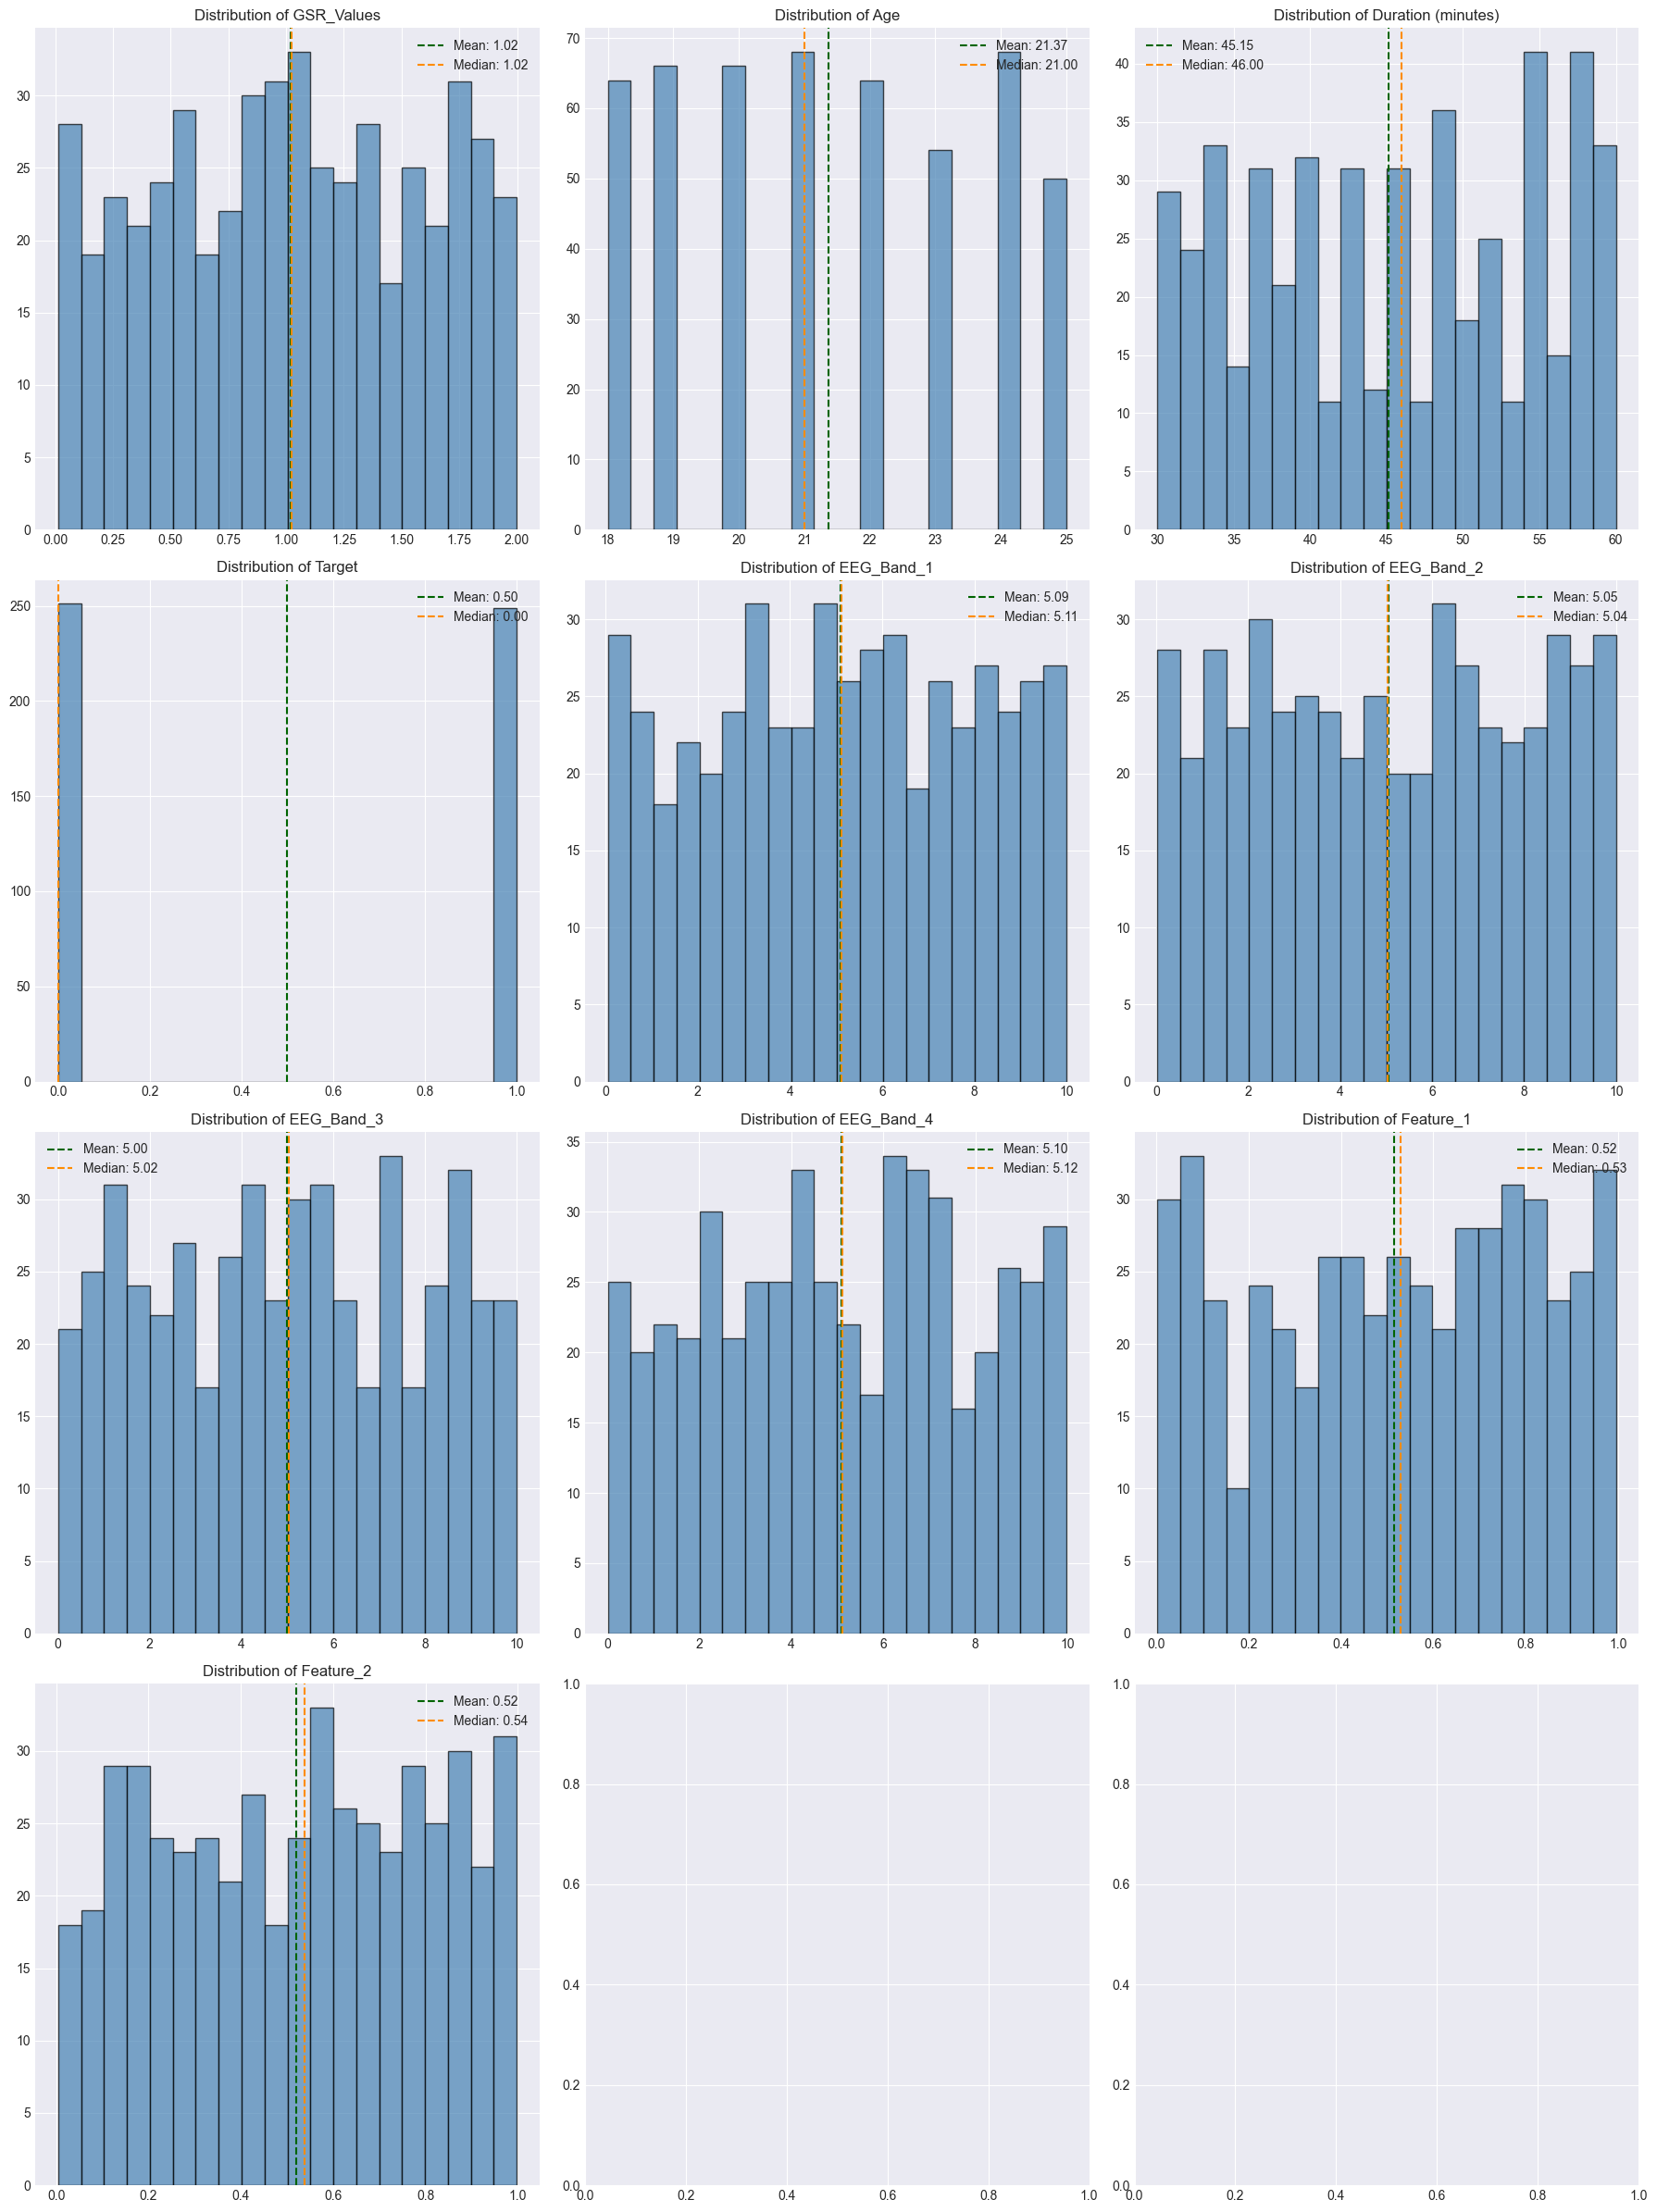


Skewness:
Age                   0.063864
Target                0.008024
EEG_Band_3           -0.004919
EEG_Band_2           -0.005177
Duration (minutes)   -0.017825
GSR_Values           -0.025025
EEG_Band_4           -0.025132
EEG_Band_1           -0.035861
Feature_2            -0.047607
Feature_1            -0.125202
dtype: float64

TARGET VARIABLE ANALYSIS


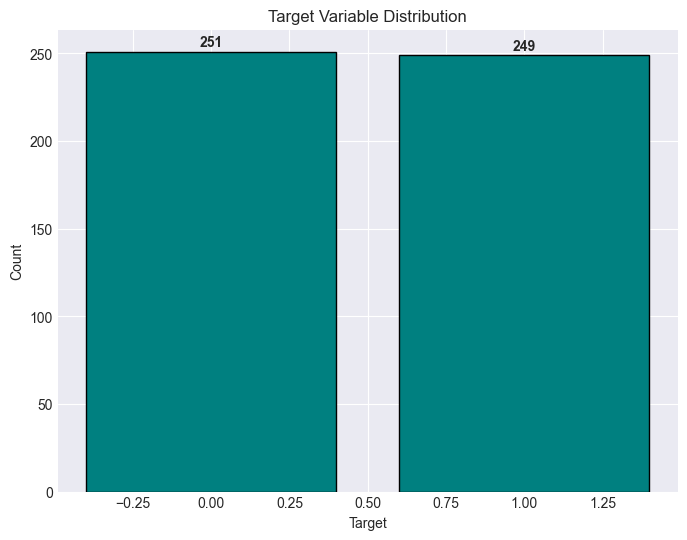

Target
0    251
1    249
Name: count, dtype: int64

Percentage Distribution:
Target
0    50.2
1    49.8
Name: count, dtype: float64

CORRELATION ANALYSIS


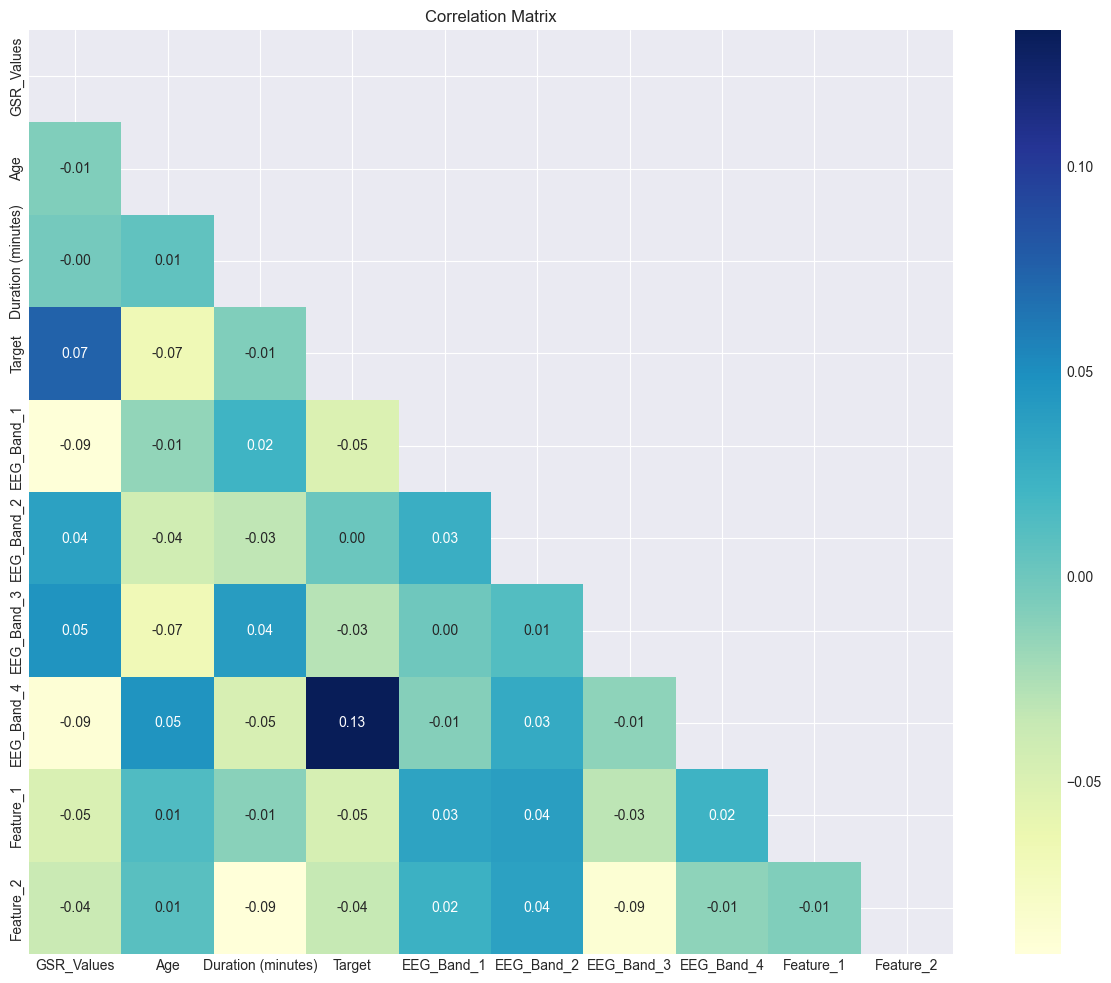


Top 5 Correlations with Target:
EEG_Band_4            0.133351
GSR_Values            0.074513
EEG_Band_2            0.001866
Duration (minutes)   -0.007971
EEG_Band_3           -0.028767
Name: Target, dtype: float64

Bottom 5 Correlations with Target:
EEG_Band_3   -0.028767
Feature_2    -0.035569
Feature_1    -0.047106
EEG_Band_1   -0.050623
Age          -0.066927
Name: Target, dtype: float64


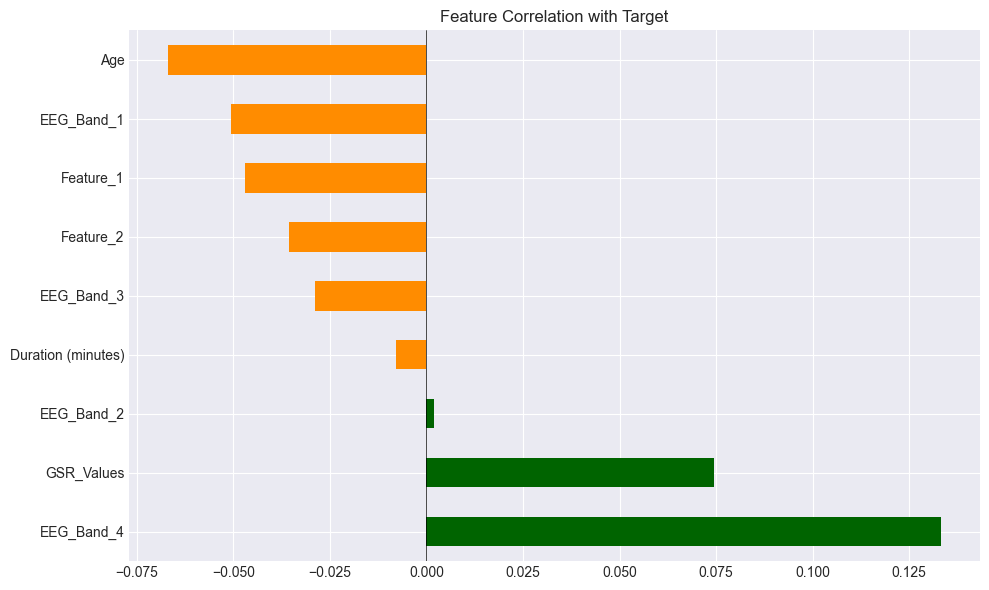


MULTICOLLINEARITY DETECTION
No high correlation pairs (|r| > 0.7)

BIVARIATE ANALYSIS


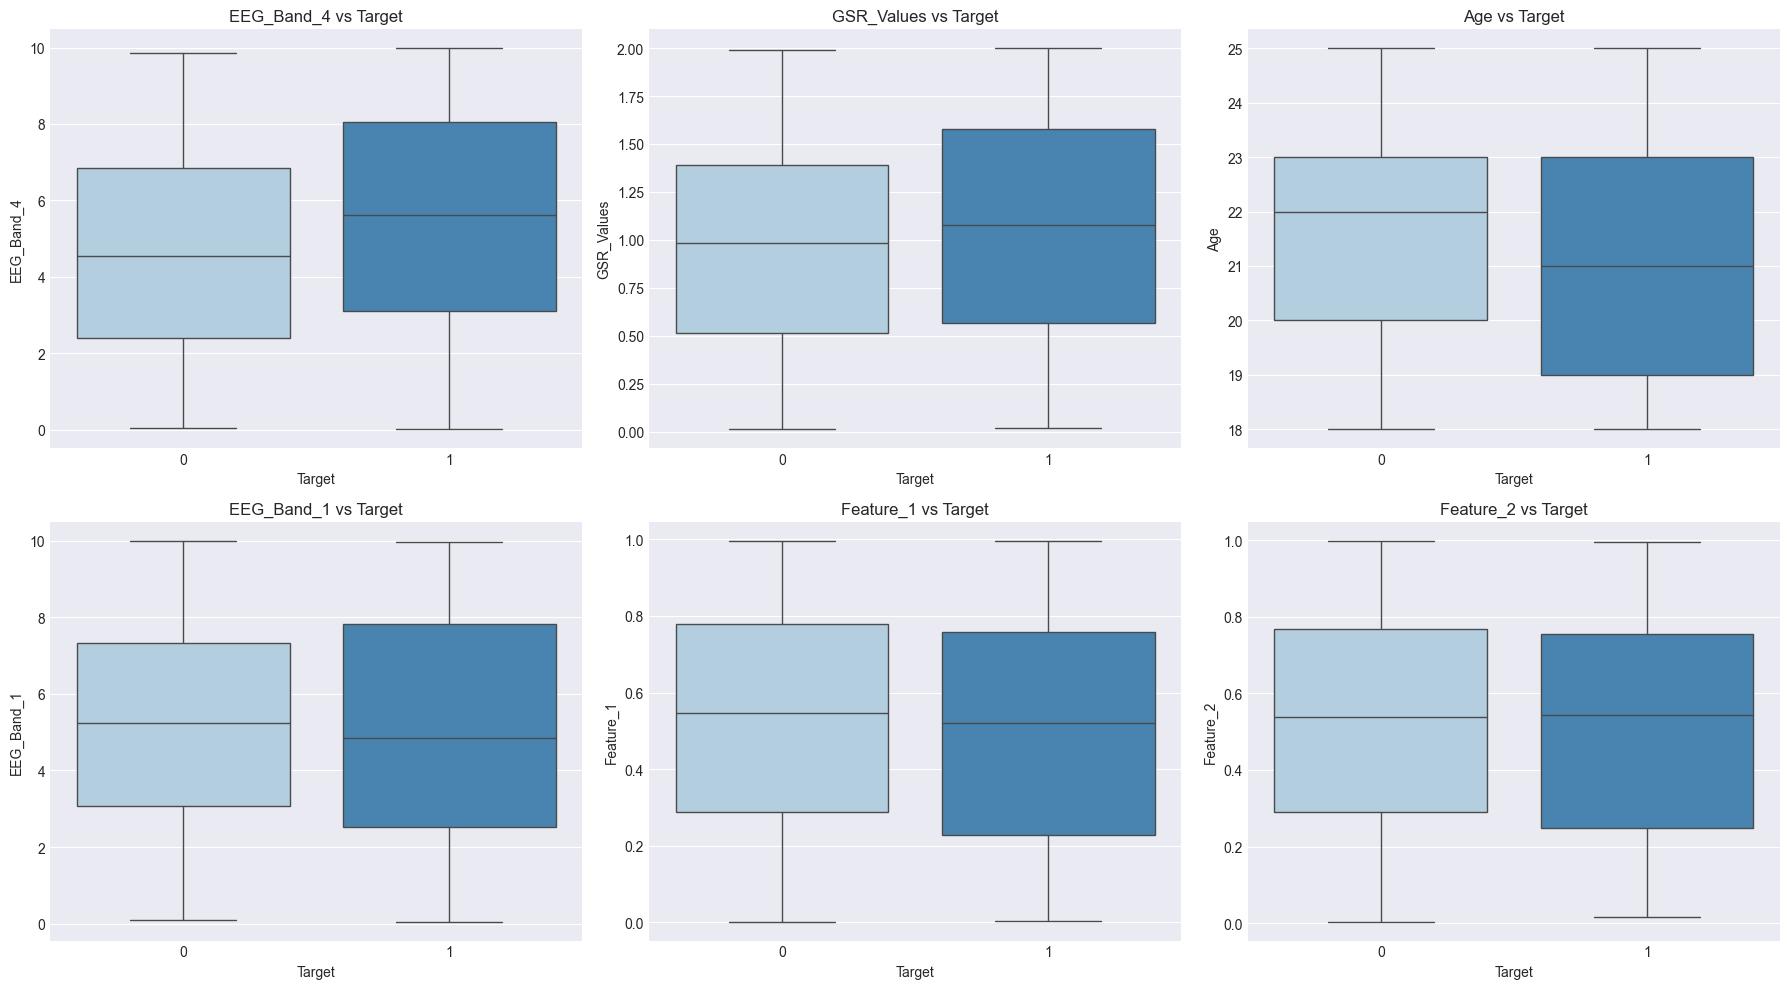


OUTLIER DETECTION
No significant outliers found across numerical features.

MUTUAL INFORMATION
                             Feature  MI Score
6                         EEG_Band_4  0.030627
4                         EEG_Band_2  0.028909
14                Session_Type_Study  0.020348
17  Environmental_Context_Quiet Room  0.016738
3                         EEG_Band_1  0.015394
16     Environmental_Context_Library  0.008251
12          Emotional_State_Stressed  0.005926
10           Cognitive_State_Focused  0.005334
1                                Age  0.000000
0                         GSR_Values  0.000000


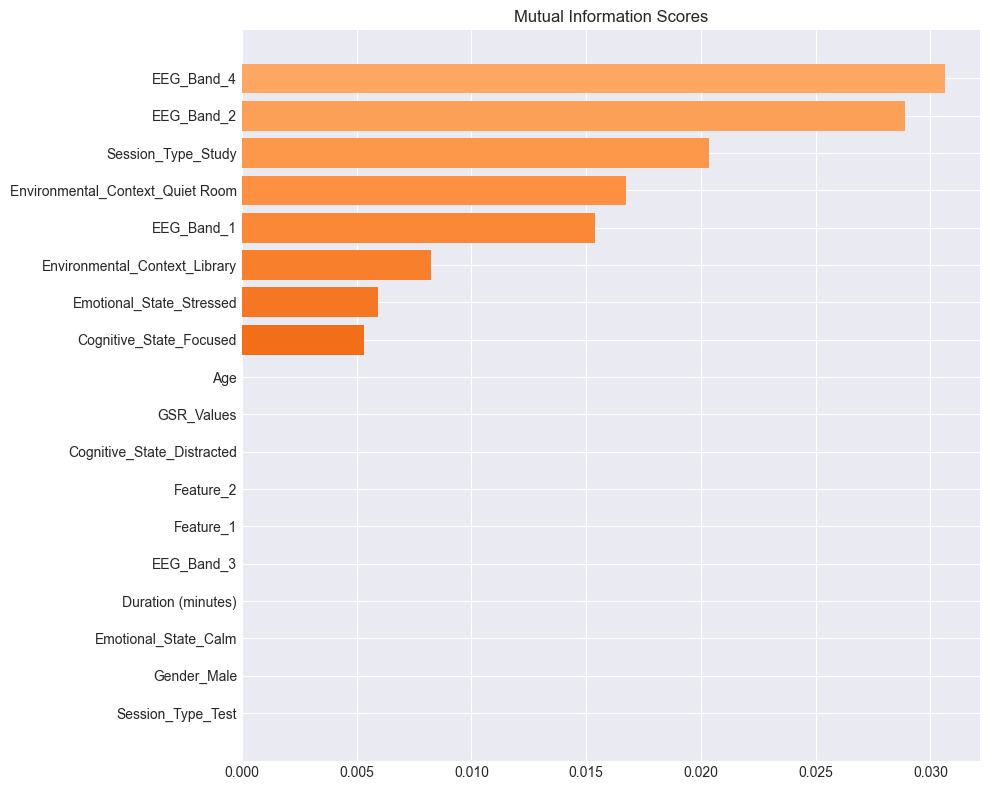


PCA DIMENSIONALITY REDUCTION


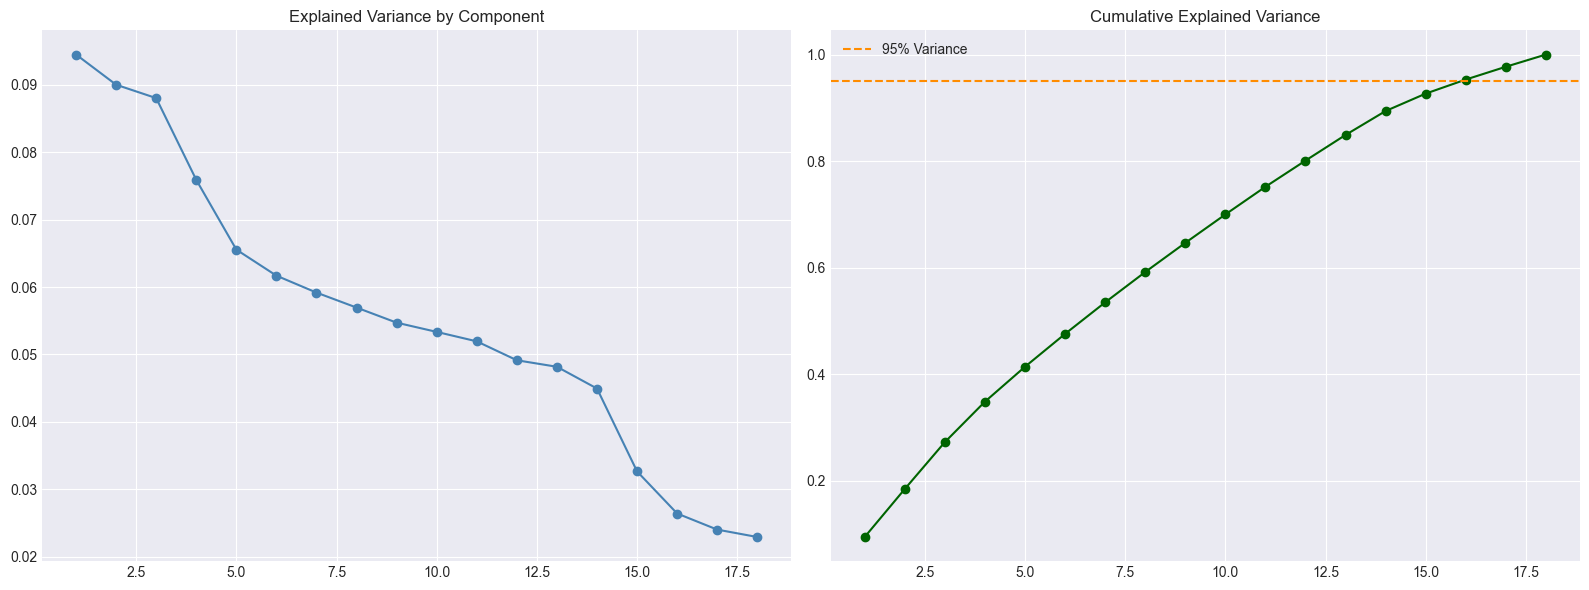

Components to reach 95% variance: 16

STATISTICAL TESTS
Normality test on Target: p-value = 0.0000 --> Not Normal

ANOVA on top correlated features:
EEG_Band_4: F = 9.02, p = 0.0028 --> Significant
GSR_Values: F = 2.78, p = 0.0961 --> Not Significant
Age: F = 2.24, p = 0.1351 --> Not Significant
EEG_Band_1: F = 1.28, p = 0.2585 --> Not Significant
Feature_1: F = 1.11, p = 0.2931 --> Not Significant
Feature_2: F = 0.63, p = 0.4274 --> Not Significant

PREPROCESSING RECOMMENDATIONS

Scaling: StandardScaler recommended for all ML models except tree-based ones.

Multicollinearity:
No multicollinearity detected.

Outliers:
No major outlier issues.

Feature Selection:
Use top 5 features from mutual information.

Target class distribution is balanced.


In [2]:
# Written by Ovi, 2025-07-21, Full EDA and feature handling for mental health wearable dataset

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('data/mental_health_wearable_data.csv')

# Convert list-like strings to actual lists
df['EEG_Frequency_Bands'] = df['EEG_Frequency_Bands'].apply(ast.literal_eval)
df['Preprocessed_Features'] = df['Preprocessed_Features'].apply(ast.literal_eval)

# Expand list columns
eeg_df = pd.DataFrame(df['EEG_Frequency_Bands'].tolist(), columns=[f'EEG_Band_{i+1}' for i in range(4)])
features_df = pd.DataFrame(df['Preprocessed_Features'].tolist(), columns=['Feature_1', 'Feature_2'])

# Combine and clean
df = pd.concat([df.drop(['EEG_Frequency_Bands', 'Preprocessed_Features', 'Timestamp', 'Student_ID'], axis=1), eeg_df, features_df], axis=1)

# =============================================================================
# 1. DATASET OVERVIEW
# =============================================================================
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())
print("\nSample:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================
print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() else "No missing values.")

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

print("\nBasic Statistics:")
print(df.describe(include='all'))

# =============================================================================
# 3. UNIVARIATE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(18, 24))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='darkgreen', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='darkorange', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

print("\nSkewness:")
print(df[numeric_cols].skew().sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

target_counts = df['Target'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index, target_counts.values, color='teal', edgecolor='black')
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')
plt.savefig('stress_level_distribution.png')
plt.show()

print(target_counts)
print("\nPercentage Distribution:")
print((target_counts / len(df) * 100).round(2))

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

target_corr = corr_matrix['Target'].drop('Target').sort_values(ascending=False)
print("\nTop 5 Correlations with Target:")
print(target_corr.head())
print("\nBottom 5 Correlations with Target:")
print(target_corr.tail())

plt.figure(figsize=(10, 6))
colors = ['darkgreen' if c > 0 else 'darkorange' for c in target_corr]
target_corr.plot(kind='barh', color=colors)
plt.title('Feature Correlation with Target')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.savefig('target_correlation.png')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================
print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    for f1, f2, val in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
        print(f"{f1} & {f2}: {val:.2f}")
else:
    print("No high correlation pairs (|r| > 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

top_features = target_corr.abs().nlargest(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for i, col in enumerate(top_features):
    sns.boxplot(data=df, x='Target', y=col, ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} vs Target')

plt.tight_layout()
plt.savefig('feature_vs_target_boxplots.png')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================
print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = {'count': count, 'percentage': 100 * count / len(df)}

outlier_df = pd.DataFrame(outlier_summary).T
# Show and plot only if outliers exist
outlier_filtered = outlier_df[outlier_df['count'] > 0]
if not outlier_filtered.empty:
    print(outlier_filtered)
    
    plt.figure(figsize=(12, 6))
    outlier_filtered['percentage'].plot(kind='bar', color='seagreen')
    plt.ylabel('Percentage of Outliers')
    plt.title('Outlier Percentage by Feature')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('outlier_percentages.png')
    plt.show()
else:
    print("No significant outliers found across numerical features.")


# =============================================================================
# 9. MUTUAL INFORMATION
# =============================================================================
print("\n" + "=" * 80)
print("MUTUAL INFORMATION")
print("=" * 80)

X = df.drop('Target', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['Target']
mi_scores = mutual_info_classif(X_encoded, y, random_state=42)

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
print(mi_df.head(10))

plt.figure(figsize=(10, 8))
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_df)))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color=colors)
plt.gca().invert_yaxis()
plt.title('Mutual Information Scores')
plt.tight_layout()
plt.savefig('mutual_information_scores.png')
plt.show()

# =============================================================================
# 10. PCA
# =============================================================================
print("\n" + "=" * 80)
print("PCA DIMENSIONALITY REDUCTION")
print("=" * 80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(range(1, len(explained) + 1), explained, marker='o', color='steelblue')
ax1.set_title('Explained Variance by Component')
ax2.plot(range(1, len(cumulative) + 1), cumulative, marker='o', color='darkgreen')
ax2.axhline(y=0.95, linestyle='--', color='darkorange', label='95% Variance')
ax2.legend()
ax2.set_title('Cumulative Explained Variance')
plt.tight_layout()
plt.savefig('pca_analysis.png')
plt.show()

n_95 = np.argmax(cumulative >= 0.95) + 1
print(f"Components to reach 95% variance: {n_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================
print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

stat, pval = stats.normaltest(df['Target'])
print(f"Normality test on Target: p-value = {pval:.4f} --> {'Normal' if pval > 0.05 else 'Not Normal'}")

print("\nANOVA on top correlated features:")
for col in top_features:
    groups = [group[col].values for name, group in df.groupby('Target')]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F = {f_stat:.2f}, p = {p_val:.4f} --> {'Significant' if p_val < 0.05 else 'Not Significant'}")

# =============================================================================
# 12. PREPROCESSING RECOMMENDATIONS
# =============================================================================
print("\n" + "=" * 80)
print("PREPROCESSING RECOMMENDATIONS")
print("=" * 80)

print("\nScaling: StandardScaler recommended for all ML models except tree-based ones.")
print("\nMulticollinearity:")
if high_corr_pairs:
    print("Consider dropping one of each highly correlated pair.")
else:
    print("No multicollinearity detected.")

print("\nOutliers:")
outlier_count = outlier_df[outlier_df['percentage'] > 5].shape[0]
if outlier_count > 0:
    print(f"{outlier_count} features have >5% outliers. Consider capping or robust scaling.")
else:
    print("No major outlier issues.")

print("\nFeature Selection:")
print(f"Use top {len(mi_df[mi_df['MI Score'] > 0.01])} features from mutual information.")

imbalance = target_counts.min() / target_counts.max()
if imbalance < 0.8:
    print("\nClass Imbalance Detected. Consider class weights or SMOTE.")
else:
    print("\nTarget class distribution is balanced.")
